In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os
from model_chain import run_chain_of_models, get_ace_date
import datetime as dt
import astropy.units as u
from sunpy.coordinates.sun import carrington_rotation_time

In [2]:
import matplotlib
import matplotlib.dates as mdates
font = {'family' : 'serif',
        'size'   : 12}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

In [3]:
# set up carrington rotation
start_time_CR2048 = carrington_rotation_time(int(2048)).to_datetime()
end_time_CR2058 = carrington_rotation_time(int(2058)+1).to_datetime()

In [4]:
# get ace data
ACE_longitude, ACE_latitude, ACE_r, ACE_vr, ACE_obstime = get_ace_date(start_time=start_time_CR2048, end_time=end_time_CR2058)
ACE_vr_is_nan = np.isnan(ACE_vr)

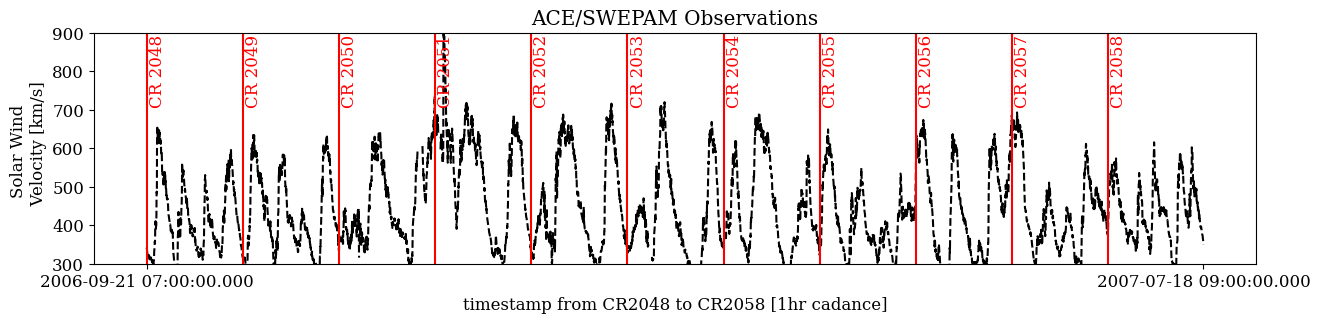

In [5]:
fig, ax = plt.subplots(figsize=(15, 3))
_ = ax.plot(ACE_obstime.value, ACE_vr, c="k", ls="--")
_ = ax.set_ylabel("Solar Wind \n  Velocity [km/s]")
_ = ax.set_title("ACE/SWEPAM Observations")
_ = ax.set_xticks([])

for ii in range(2048, 2059):
    start_time = carrington_rotation_time(int(ii)).to_datetime()
    min_index = np.argmin(np.abs(start_time - ACE_obstime.to_datetime()))
    _ = ax.vlines(ACE_obstime[min_index].value, 300, 900, color="red")
    _ = ax.text(ACE_obstime[min_index + 15].value, 800, "CR " + str(ii), rotation=90, verticalalignment='center', fontsize=12, color="red")

_ = ax.set_xlabel("timestamp from CR2048 to CR2058 [1hr cadance]")
_ = ax.set_ylim(300, 900)
_ = ax.set_xticks([ACE_obstime.value[0], ACE_obstime.value[-1]])
plt.savefig("figs/ACE/cr2048_to_cr2058.png", dpi=600)

In [6]:
# set up carrington rotation
start_time_CR2059 = carrington_rotation_time(int(2059)).to_datetime()
end_time_CR2069 = carrington_rotation_time(int(2069)+1).to_datetime()

In [ ]:
# get ace data
ACE_longitude, ACE_latitude, ACE_r, ACE_vr, ACE_obstime = get_ace_date(start_time=start_time_CR2059, end_time=end_time_CR2069)
ACE_vr_is_nan = np.isnan(ACE_vr)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 3))
_ = ax.plot(ACE_obstime.value, ACE_vr, c="k", ls="--")
_ = ax.set_ylabel("Solar Wind \n  Velocity [km/s]")
_ = ax.set_title("ACE/SWEPAM Observations")
_ = ax.set_xticks([])

for ii in range(2059, 2070):
    start_time = carrington_rotation_time(int(ii)).to_datetime()
    min_index = np.argmin(np.abs(start_time - ACE_obstime.to_datetime()))
    _ = ax.vlines(ACE_obstime[min_index].value, 300, 900, color="red")
    _ = ax.text(ACE_obstime[min_index + 15].value, 800, "CR " + str(ii), rotation=90, verticalalignment='center', fontsize=12, color="red")

_ = ax.set_xlabel("timestamp from CR2059 to CR2069 [1hr cadance]")
_ = ax.set_xticks([ACE_obstime.value[0], ACE_obstime.value[-1]])
_ = ax.set_ylim(300, 900)
plt.savefig("figs/ACE/cr2059_to_cr2069.png", dpi=600)